In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_regression
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import metrics # 모델평가시 이용

In [8]:
X = pd.read_excel('연습.xlsx')

In [10]:
X.drop(columns=['Unnamed: 0'],inplace=True)

In [12]:
y = pd.read_excel('target.xlsx')

In [14]:
y.drop(columns=['Unnamed: 0'],inplace=True)

In [18]:
y = np.array(y)

In [19]:
# dataset train/test set 으로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Multi Linear Regression

## 모델 세우기

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 모델 평가

In [21]:
from sklearn import metrics
y_pred = model.predict(X_test)
print ("MAE :", metrics.mean_absolute_error(y_test,y_pred))

MAE : 9559701.517849905


# Polynomial regression

변수가 적다면, 데이터 분석시 부정확 할 수 있다. 그래서 polynomial 로 변수의 갯수를 늘려서 예측도를 높혀보자

## 데이터 전처리

다항회귀는, 데이터를 돌리기 전, x1 x2 -> x1^2 , x1x2, x2^2 처럼 데이터를 바꾸어야 한다.를 해주어야한다.

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()  
# degree : 몇 차수까진 늘릴지 결정
#        : (default)=2
# interaction_only : only 자기 자신의 거듭제곱만 넣을지 말지. (ex x1 x2 -> x1^2 , ^2)
#                  : (default)=False (interaction 항 넣기) (EX x1 x2 -> x1^2 , x1x2, x2^2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

## 모델 세우기

In [8]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 모델 평가

In [22]:
from sklearn import metrics
y_pred = model.predict(X_test_poly)
print ("MAE :", metrics.mean_squared_error(y_test,y_pred))
print("R squared :", metrics.r2_score(y_test,y_pred))

NameError: name 'X_test_poly' is not defined

# Ridge regression

$w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2 + \lambda \sum_{j=1}^M w_j^2 \right) $

## 모델 세우기

In [23]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

para_range = np.logspace(-3, 3, num=50) # 10^-3 ~ 10^3 
model = RidgeCV(alphas = para_range , cv=5)
model.fit(X_train, y_train) ;


## 모델 평가

In [26]:
from sklearn import metrics

predicted = model.predict(X_test) 

print ("MSE :",metrics.mean_absolute_error(y_test, predicted))

MSE : 9558827.597443607


# ElasticNet Regression

In [30]:
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet

## 모델 세우기

In [31]:
ElasticCV = ElasticNetCV(l1_ratio =[.1, .5, .7, .9, .95, .99,1], cv=5, random_state=0)
# l1 Note that a good choice of list of values for l1_ratio is often to put more values close to 1 (i.e. Lasso) and less close to 0 (i.e. Ridge), as in  [.1, .5, .7, .9, .95, .99, 1] 

ElasticCV.fit(X_train, y_train)
print(ElasticCV.alpha_) # alpha 값
print(ElasticCV.l1_ratio_) #l1 ratio 1 이면 사실상 lasso 이다... 1 이 나오면 그냥 lasso 로 하라는 의미

C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


12205.5497780353
1.0


## 모델 평가

In [32]:
from sklearn import metrics

predicted = ElasticCV.predict(X_test) 

print ("MSE :", metrics.mean_squared_error(y_test, predicted))
print('R_squared :',model.score(X_test, y_test)) # C-V 로 찾은 최적의 ridge 로 계산한 R^2

MSE : 197154599174786.22
R_squared : 0.5354178355010952


## 변수 중요도

Text(0.5, 1.0, 'Coefficients in the Model')

C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\matplotlib

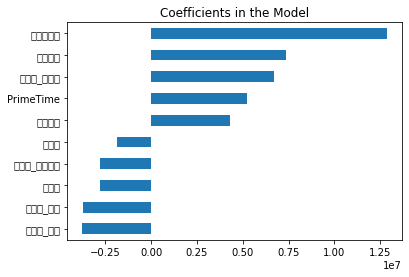

In [33]:
coef = pd.Series(ElasticCV.coef_, index = X_train.columns).sort_values()
imp_coef = pd.concat([coef.head(5), coef.tail(5)])
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Model")

# lasso regression

## 모델 세우기

In [34]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
alphas = np.logspace(-3, 3, num=50) # 10^-3 ~ 10^3 
lassocv = LassoCV(alphas = alphas, cv=5)
# 위 ridge 때와 동일
lassocv.fit(X_train, y_train) ;

C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2227320424347648.0, tolerance: 968156428896909.0
  tol, rng, random, positive)
C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6558555048090112.0, tolerance: 968156428896909.0
  tol, rng, random, positive)
C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not 

C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7873358362881536.0, tolerance: 955873157373860.8
  tol, rng, random, positive)
C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7870163011049472.0, tolerance: 955873157373860.8
  tol, rng, random, positive)
C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7867740387201536.0, tolerance: 955873157373860.8
  tol, rng, random, positive)
C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: Conve

C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7923498126692352.0, tolerance: 968194175381952.5
  tol, rng, random, positive)
C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7923488940479488.0, tolerance: 968194175381952.5
  tol, rng, random, positive)
C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7923474804218880.0, tolerance: 968194175381952.5
  tol, rng, random, positive)
C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: Conve

C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2630313639364096e+16, tolerance: 971729983474725.4
  tol, rng, random, positive)
C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1260320365845504e+16, tolerance: 971729983474725.4
  tol, rng, random, positive)
C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9630411758983168.0, tolerance: 971729983474725.4
  tol, rng, random, positive)
C:\Users\goran\Anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:52

## 모델 평가

In [35]:
from sklearn import metrics
predicted = lassocv.predict(X_test) 

print ("MSE :", (y_test, predicted))
print('R_squared :',lassocv.score(X_test, y_test)) # C-V 로 찾은 최적의 ridge 로 계산한 R^2

MSE : (array([[ 5508000],
       [26447000],
       [16785000],
       ...,
       [ 8275000],
       [28690000],
       [51089000]], dtype=int64), array([ 5712565.19144358, 48616414.08755106, 20758448.09999381, ...,
        4352701.199998  , 46885034.34653322, 45299512.54233735]))
R_squared : 0.5354216741299076


## 변수 중요도

Text(0.5, 1.0, 'Coefficients in the Model')

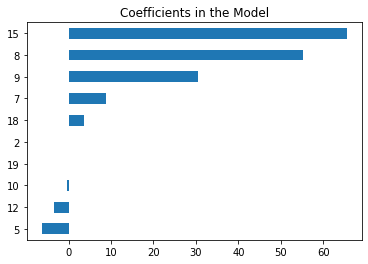

In [173]:
coef = pd.Series(lassocv.coef_, index = X_train.columns).sort_values()
imp_coef = pd.concat([coef.head(5), coef.tail(5)])
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Model")

# K-Neighbors Regression

## 모델 세우기

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
model = KNeighborsRegressor() 
param_grid ={'n_neighbors' : np.arange(1,10)}
model = GridSearchCV(model,param_grid,cv=5)
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [12]:
print(model.best_params_) # 우리가 추정한 best parameter
print(model.best_score_) # 우리가 지정한 scoring 에 기반한 제일 좋은 score

{'n_neighbors': 9}
0.07674181821732702


## 모델 평가

In [14]:
y_pred = model.predict(X_test)
print ("MSE :", metrics.mean_squared_error(y_test, y_pred))
print("R squared :", metrics.r2_score(y_test, y_pred))

MSE : 10.361920123323124
R squared : 0.03871893003945159


#  DecisionTree Regression

## 모델 세우기

In [28]:
# hyper parameter 추정하기
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor(min_samples_split=50) 
param_grid ={'max_depth' : np.arange(1,10)}
grid_search = GridSearchCV(model,param_grid,cv=5)
# scoring 은 default 이므로 model 의 자체 scoring 으로 들어간다. 
grid_search.fit(X_train,y_train)
print(grid_search.best_params_) # 우리가 추정한 best parameter
print(grid_search.best_score_) # 우리가 지정한 scoring 에 기반한 제일 좋은 score

{'max_depth': 3}
0.1642263297785934


In [169]:
# 위에서 구한 최상의 parameter 로 추정하기
model = DecisionTreeRegressor(max_depth=3,min_samples_split=50)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=50)

## 모델 평가

In [171]:
y_pred = model.predict(X_test)
print ("MSE :", metrics.mean_squared_error(y_test, y_pred))
print("R squared :", metrics.r2_score(y_test, y_pred))

MSE : 10.167059541425553
R squared : 0.05679625416763223


## 변수 중요도

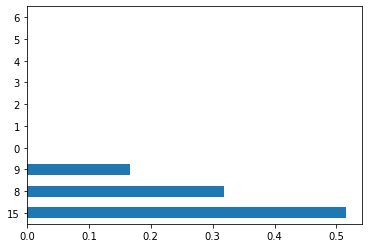

In [174]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

# RandomForest Regressoion

## 모델 세우기

In [175]:
from sklearn.ensemble import RandomForestRegressor
model =  RandomForestRegressor(n_estimators=100,min_samples_split=50,oob_score = True)
model.fit(X_train,y_train)

RandomForestRegressor(min_samples_split=50, oob_score=True)

## 모델 평가

In [176]:
y_pred = model.predict(X_test)
print ("MSE :", metrics.mean_squared_error(y_test, y_pred))
print('R_squared :',model.score(X_test, y_test)) 

MSE : 9.122743345930665
R_squared : 0.15367804613617586


## 변수 중요도

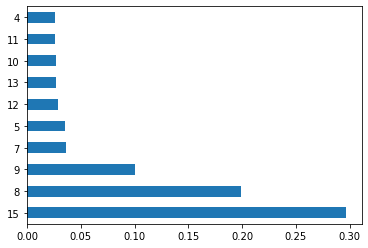

In [177]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

# Gradient Boosting resgressoion

## 모델 세우기

In [185]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

## 모델 평가

In [183]:
y_pred = model.predict(X_test)
print ("MSE :", metrics.mean_squared_error(y_test, y_pred))
print('R_squared :',model.score(X_test, y_test)) 

MSE : 9.20309670520304
R_squared : 0.14622362048369353


## 변수 중요도

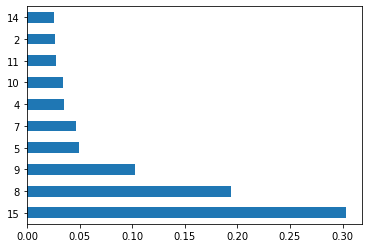

In [184]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

# AdaBoosting Regression

## 모델 세우기

In [190]:
from sklearn.ensemble import AdaBoostRegressor
model =AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=100, random_state=42)

## 모델 평가

In [191]:
y_pred = model.predict(X_test)
print ("MSE :", metrics.mean_squared_error(y_test, y_pred))
print('R_squared :',model.score(X_test, y_test)) 

MSE : 9.162934119354837
R_squared : 0.14994952582141596


## 변수 중요도

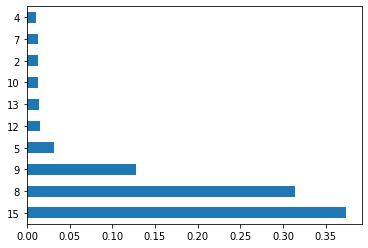

In [192]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

 # xgboost Regression

## 모델 세우기

In [1]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.08,max_depth=3,reg_alpha=1)
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

## 모델 평가

In [47]:
from sklearn import metrics
y_pred = model.predict(X_test)
print ("MSE :", metrics.mean_squared_error(y_test, y_pred))
print('R_squared :',model.score(X_test, y_test)) 

MSE : 9.123864862015253
R_squared : 0.15357400246773023


## 변수 중요도

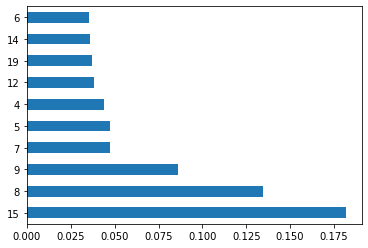

In [48]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

# SVR regression

## 모델 세우기

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV 
SVR = SVR()
# gridsearch 로 최적의 parameter 를 고르자.
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear','poly']}  
model = GridSearchCV(SVR, param_grid) 

# fitting the model for grid search 
model.fit(X_train, y_train) 

In [65]:
# 모델은 어떤 경우에 최고 좋았는가?
model.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

## 모델 평가

In [66]:
from sklearn import metrics
y_pred = svr_rbf.predict(X_test)
print ("MSE :", metrics.mean_squared_error(y_test, y_pred))
print('R_squared :',model.score(X_test, y_test)) 

MSE : 8.79871044038635
R_squared : 0.2010870121689774
